In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
##Question-1
da=pd.read_csv(r"C:\Users\kiits\Downloads\customers.csv")
da

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#Question 2 
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
da.isnull().sum()  #returns the number of missing values in dataest

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

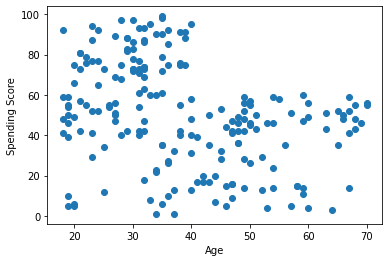

In [5]:
# Question 3
plt.scatter(x=da['Age'],y=da['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [6]:
# Questions 4
d1=da['Age'].values
d2=da['Spending Score (1-100)'].values
x=np.array(list(zip(d1,d2)))


In [7]:
inertia=[]

In [8]:
for n in range(1,11):
    alg=KMeans(n_clusters=n)
    alg.fit(x)
    inertia.append(alg.inertia_)
    

In [9]:
inertia

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23818.41168818787,
 19660.396362433858,
 15514.193134351033,
 13024.101653416463,
 11443.32420663676,
 10454.388632703849]

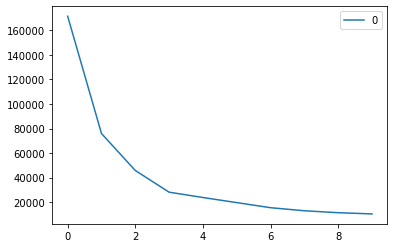

In [10]:
pd.DataFrame(inertia).plot()
plt.show()

In [11]:
alg=KMeans(n_clusters=3)
alg.fit(x)
labels=alg.labels_

In [12]:
labels

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [13]:
clusters=da[['Age','Spending Score (1-100)']]
clusters=clusters.assign(clusters=labels)
clusters

,Age,Spending Score (1-100),clusters
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not cluster

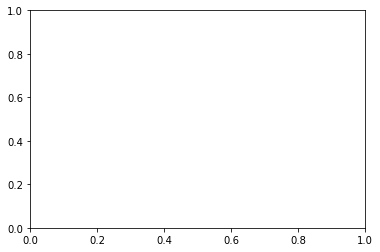

In [14]:
# Question 5
clusters.plot.scatter(x='Age',y='Spending Score (1-100)', c='cluster', colormap='viridis')
plt